<a href="https://colab.research.google.com/github/krikorantranik/Private/blob/main/NLPfindOffensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import json
pd.options.mode.chained_assignment = None  # default='warn'
from io import StringIO
from html.parser import HTMLParser
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltkstop = stopwords.words('english')
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
snow = SnowballStemmer(language='english')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
maindataset = pd.read_csv("labeled_data.csv")

countries = pd.read_json("countries.json")
countries["country"] = countries["country"].str.lower()
countries = pd.DataFrame(countries["country"].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
countries.columns = ['word']
countries["replacement"] = "xcountryx"

provincies = pd.read_csv("countries_provincies.csv")
provincies1 = provincies[["name"]]
provincies1["name"] = provincies1["name"].str.lower()
provincies1 = pd.DataFrame(provincies1["name"].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
provincies1.columns = ['word']
provincies1["replacement"] = "xprovincex"
provincies2 = provincies[["name_alt"]]
provincies2["name_alt"] = provincies2["name_alt"].str.lower()
provincies2 = pd.DataFrame(provincies2["name_alt"].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
provincies2.columns = ['word']
provincies2["replacement"] = "xprovincex"
provincies3 = provincies[["type_en"]]
provincies3["type_en"] = provincies3["type_en"].str.lower()
provincies3 = pd.DataFrame(provincies3["type_en"].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
provincies3.columns = ['word']
provincies3["replacement"] = "xsubdivisionx"
provincies4 = provincies[["admin"]]
provincies4["admin"] = provincies4["admin"].str.lower()
provincies4 = pd.DataFrame(provincies4["admin"].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
provincies4.columns = ['word']
provincies4["replacement"] = "xcountryx"
provincies5 = provincies[["geonunit"]]
provincies5["geonunit"] = provincies5["geonunit"].str.lower()
provincies5 = pd.DataFrame(provincies5["geonunit"].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
provincies5.columns = ['word']
provincies5["replacement"] = "xcountryx"
provincies6 = provincies[["gn_name"]]
provincies6["gn_name"] = provincies6["gn_name"].str.lower()
provincies6 = pd.DataFrame(provincies6["gn_name"].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
provincies6.columns = ['word']
provincies6["replacement"] = "xcountryx"
provincies = pd.concat([provincies1,provincies2,provincies3,provincies4,provincies5,provincies6], axis=0, ignore_index=True)

currencies = pd.read_json("country-by-currency-name.json")
currencies1 = currencies[["country"]]
currencies1["country"] = currencies1["country"].str.lower()
currencies1 = pd.DataFrame(currencies1["country"].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
currencies1.columns = ['word']
currencies1["replacement"] = "xcountryx"
currencies2 = currencies[["currency_name"]]
currencies2["currency_name"] = currencies2["currency_name"].str.lower()
currencies2 = pd.DataFrame(currencies2["currency_name"].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
currencies2.columns = ['word']
currencies2["replacement"] = "xcurrencyx"
currencies = pd.concat([currencies1,currencies2], axis=0, ignore_index=True)

firstnames = pd.read_csv("interall.csv", header=None)
firstnames = firstnames[firstnames[1]>=10000]
firstnames = firstnames[[0]]
firstnames[0] = firstnames[0].str.lower()
firstnames = pd.DataFrame(firstnames[0].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
firstnames.columns = ['word']
firstnames["replacement"] = "xfirstnamex"

lastnames = pd.read_csv("intersurnames.csv", header=None)
lastnames = lastnames[lastnames[1]>=10000]
lastnames = lastnames[[0]]
lastnames[0] = lastnames[0].str.lower()
lastnames = pd.DataFrame(lastnames[0].apply(lambda x: str(x).replace('-',' ').replace('.',' ').replace('_',' ').replace(',',' ').replace(':',' ').split(" ")).explode())
lastnames.columns = ['word']
lastnames["replacement"] = "xlastnamex"

temporaldata = pd.read_csv("temporal.csv")

dictionary = pd.concat([lastnames,temporaldata,firstnames,currencies,provincies,countries], axis=0, ignore_index=True)
dictionary = dictionary.groupby(["word"]).first().reset_index(drop=False)
dictionary = dictionary.dropna()

maindataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


It might be necessary to understand a little the data. From Kaggle:

count
number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF)

hate_speech
number of CF users who judged the tweet to be hate speech

offensive_language
number of CF users who judged the tweet to be offensive

neither
number of CF users who judged the tweet to be neither offensive nor non-offensive

class
class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

With that, I will filter out the column for class and convert the other to percentage of users. Then I will do a regression, since I am dealing with semi-continous data

In [5]:
maindataset['hate_speech'] = 1.00*maindataset['hate_speech']/maindataset['count']
maindataset['offensive_language'] = 1.00*maindataset['offensive_language']/maindataset['count']

maindataset = maindataset[['hate_speech',	'offensive_language', 'tweet']]
maindataset = maindataset.dropna()
maindataset.describe()

,hate_speech,offensive_language
count,24783.000000,24783.000000
mean,0.087243,0.739886
std,0.196461,0.363079
min,0.000000,0.000000
25%,0.000000,0.666667
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


Functions used to clean text

In [6]:
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

def replace_words(tt, lookp_dict):
 temp = tt.split()
 res = []
 for wrd in temp:
  res.append(lookp_dict.get(wrd, wrd))
 res = ' '.join(res)
 return res

def preprepare(eingang):
 ausgang = strip_tags(eingang)
 ausgang = eingang.lower()
 ausgang = ausgang.replace(u'\xa0', u' ')
 ausgang = re.sub(r'^\s*$',' ',str(ausgang))
 ausgang = ausgang.replace('|', ' ')
 ausgang = ausgang.replace('ï', ' ')
 ausgang = ausgang.replace('»', ' ')
 ausgang = ausgang.replace('¿', '. ')
 ausgang = ausgang.replace('ï»¿', ' ')
 ausgang = ausgang.replace('"', ' ')
 ausgang = ausgang.replace("'", " ")
 ausgang = ausgang.replace('?', ' ')
 ausgang = ausgang.replace('!', ' ')
 ausgang = ausgang.replace(',', ' ')
 ausgang = ausgang.replace(';', ' ')
 ausgang = ausgang.replace('.', ' ')
 ausgang = ausgang.replace("(", " ")
 ausgang = ausgang.replace(")", " ")
 ausgang = ausgang.replace("{", " ")
 ausgang = ausgang.replace("}", " ")
 ausgang = ausgang.replace("[", " ")
 ausgang = ausgang.replace("]", " ")
 ausgang = ausgang.replace("~", " ")
 ausgang = ausgang.replace("@", " ")
 ausgang = ausgang.replace("#", " ")
 ausgang = ausgang.replace("$", " ")
 ausgang = ausgang.replace("%", " ")
 ausgang = ausgang.replace("^", " ")
 ausgang = ausgang.replace("&", " ")
 ausgang = ausgang.replace("*", " ")
 ausgang = ausgang.replace("<", " ")
 ausgang = ausgang.replace(">", " ")
 ausgang = ausgang.replace("/", " ")
 ausgang = ausgang.replace("\\", " ")
 ausgang = ausgang.replace("`", " ")
 ausgang = ausgang.replace("+", " ")
 ausgang = ausgang.replace("=", " ")
 ausgang = ausgang.replace("_", " ")
 ausgang = ausgang.replace("-", " ")
 ausgang = ausgang.replace(':', ' ')
 ausgang = ausgang.replace('\n', ' ').replace('\r', ' ')
 ausgang = ausgang.replace(" +", " ")
 ausgang = ausgang.replace(" +", " ")
 ausgang = ausgang.replace('?', ' ')
 ausgang = re.sub('[^a-zA-Z]', ' ', ausgang)
 ausgang = re.sub(' +', ' ', ausgang)
 ausgang = re.sub('\ +', ' ', ausgang)
 ausgang = re.sub(r'\s([?.!"](?:\s|$))', r'\1', ausgang)
 return ausgang


Clean up the dictionary data

In [7]:
dictionary["word"] = dictionary["word"].apply(lambda x: preprepare(x))
dictionary = dictionary[dictionary["word"] != " "]
dictionary = dictionary[dictionary["word"] != ""]
dictionary = {row['word']: row['replacement'] for index, row in dictionary.iterrows()}

Preparation of the text data to convert: created a new column with the cleaned version of the text. This is what will be converted to vectors. Then I replace the stopwords and words in the dictionary

In [10]:
maindataset["NLPtext"] = maindataset["tweet"]
maindataset["NLPtext"] = maindataset["NLPtext"].str.lower()
maindataset["NLPtext"] = maindataset["NLPtext"].apply(lambda x: preprepare(str(x)))
maindataset["NLPtext"] = maindataset["NLPtext"].apply(lambda x: ' '.join([word for word in x.split() if word not in (nltkstop)]))
maindataset["NLPtext"] = maindataset["NLPtext"].apply(lambda x: replace_words(str(x), dictionary))

The last part in preparing the text is stemming. This is done in this case, since anyways I am training the model from scratch. I do this because it is likely that some of the offensive language is not even in pretrained models

In [11]:
def steming(sentence):
 words = word_tokenize(sentence)
 singles = [snow.stem(plural) for plural in words]
 oup = ' '.join(singles)
 return oup

maindataset["NLPtext"] = maindataset["NLPtext"].apply(lambda x: steming(x))
maindataset['lentweet'] = maindataset["tweet"].apply(lambda x: len(str(x).split(' ')))
maindataset = maindataset[maindataset['NLPtext'].notna()]
maindataset = maindataset[maindataset['lentweet']>=3]
maindataset = maindataset.reset_index(drop=False)
maindataset

,index,hate_speech,offensive_language,tweet,NLPtext,lentweet
0,0,0.0,0.000000,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolov woman complain clean xlastnamex a...,25
1,1,0.0,1.000000,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...,16
2,2,0.0,1.000000,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabi life ever fuck ...,21
3,3,0.0,0.666667,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt xprovincex xprovincex xlastnamex viva base ...,9
4,4,0.0,1.000000,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikarobert shit hear might xlastnamex mi...,26
...,...,...,...,...,...,...
24560,24778,0.0,0.666667,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeask pearl xlastnamex xfirstname...,19
24561,24779,0.0,0.333333,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart xfirstnamex drove redne...,13
24562,24780,0.0,1.000000,young buck wanna eat!!.. dat nigguh like I ain...,xlastnamex buck wan na eat dat nigguh like ain...,13
24563,24781,0.0,1.000000,youu got wild bitches tellin you lies,youu got xlastnamex bitch tellin xfirstnamex,7


Train the model

In [12]:
trainset = maindataset.sample(frac=1).reset_index(drop=True)
trainset = trainset[(trainset['NLPtext'].str.len() >= 3)]
trainset = trainset.sample(frac=1).reset_index(drop=True)
trainset = trainset[["NLPtext"]]

tagged_data = []
for index, row in trainset.iterrows():
 part = TaggedDocument(words=word_tokenize(row[0]), tags=[str(index)])
 tagged_data.append(part)
model = Doc2Vec(vector_size=250, min_count=3, epochs=20, dm=1)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
model.save("d2v.model")
print("Model Saved")


Model Saved


Vetorize the tweets

In [13]:
a = []
for index, row in maindataset.iterrows():
 nlptext = row['NLPtext']
 ids = row['index']
 vector = model.infer_vector(word_tokenize(nlptext))
 vector = pd.DataFrame(vector).T
 vector.index = [ids]
 a.append(vector)
textvectors = pd.concat(a)
textvectors


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.048061,0.012163,0.041622,0.021011,-0.060378,-0.057699,-0.027169,0.044077,-0.013475,-0.034823,...,0.007444,-0.063553,-0.077756,0.058352,0.045476,0.020608,0.024222,-0.025630,0.025377,-0.079746
1,0.057534,0.086508,0.052836,-0.109271,0.011120,-0.013560,-0.039978,-0.001674,-0.048335,0.052126,...,-0.004404,-0.047669,0.028163,0.009058,0.014895,-0.145643,0.050901,-0.019858,0.041368,0.061380
2,0.028422,-0.082247,0.014463,0.014675,-0.067483,0.012068,0.049572,0.059953,-0.070932,-0.016952,...,0.020224,-0.038879,0.035015,0.091254,0.007789,0.015274,0.023574,0.021592,0.017669,0.010561
3,0.011935,-0.018182,-0.005076,-0.012978,-0.066108,-0.019043,0.015165,0.034808,-0.042948,-0.022296,...,0.017040,-0.019388,-0.028721,0.037576,0.025829,-0.045389,0.011880,0.032836,0.009736,-0.005813
4,0.001277,-0.031920,-0.048385,-0.028837,-0.019610,-0.013806,-0.019418,0.063314,-0.081486,0.052411,...,0.043425,-0.021423,0.038427,0.078896,0.036654,-0.005026,-0.026652,0.025569,-0.058816,0.058668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,-0.005615,-0.042238,0.067481,0.034976,-0.024806,-0.068650,0.010698,0.003728,0.031104,-0.024339,...,0.005275,-0.014770,-0.054588,0.013530,-0.057009,0.044760,-0.011603,0.004576,-0.045580,0.068992
24779,0.003152,-0.020303,-0.043565,0.009834,-0.012915,0.001521,-0.045066,0.026512,-0.027692,-0.010510,...,0.018211,-0.037482,0.018735,-0.023174,0.053940,0.006508,0.022993,-0.025152,0.024538,0.036594
24780,0.001234,-0.076184,0.020315,-0.063270,-0.031037,-0.021308,0.027183,0.019100,0.043025,0.051472,...,-0.050632,-0.007220,-0.037618,-0.035678,-0.003051,-0.108726,0.008644,-0.013387,-0.001966,0.014417
24781,0.061315,0.009324,0.027559,0.031807,-0.052977,-0.014170,-0.004257,0.044428,-0.000844,-0.001562,...,-0.030841,-0.051488,-0.000577,-0.017556,0.028342,-0.017555,0.005670,-0.037322,0.012798,0.013356


Standarization

In [14]:
def properscaler(simio):
 scaler = StandardScaler()
 resultsWordstrans = scaler.fit_transform(simio)
 resultsWordstrans = pd.DataFrame(resultsWordstrans)
 resultsWordstrans.index = simio.index
 resultsWordstrans.columns = simio.columns
 return resultsWordstrans

datasetR = properscaler(textvectors)

I'll split in train and test sets

In [49]:
datasetR['target'] = maindataset['offensive_language'].values

outp = train_test_split(datasetR, train_size=0.7)
finaleval=outp[1]
subset=outp[0]

x_subset = subset.drop(columns=["target"]).to_numpy()
y_subset = subset['target'].to_numpy()
x_finaleval = finaleval.drop(columns=["target"]).to_numpy()
y_finaleval = finaleval[['target']].to_numpy()
#size of the training set
len(y_subset)

17195

The distribution of the response is relevant to select the activation functions used in the neural network

<ipython-input-109-8e3d4eba9678>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_subset,shade=True)


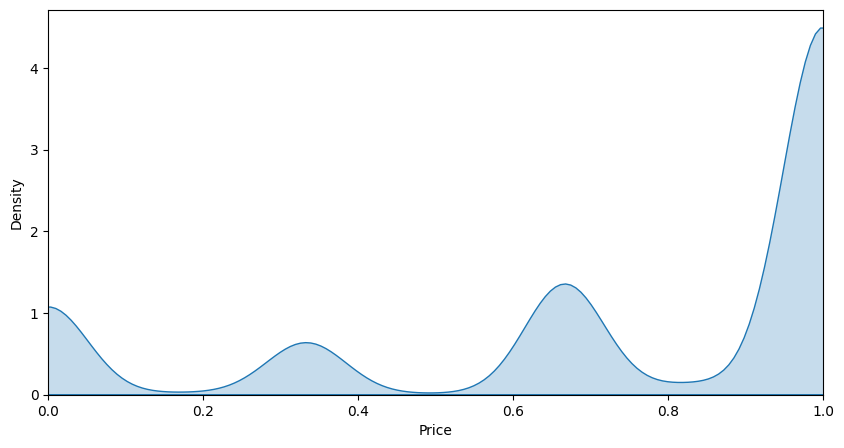

In [109]:
plt.figure(figsize=(10,5))
plt.xlim(0,1)
plt.xlabel('Price')
plt.ylabel('Density')
sns.kdeplot(y_subset,shade=True)
plt.show()

Definitions for the neural network model using Tensorflow / keras

In [114]:
#initialize
neur = tf.keras.models.Sequential()
#first layer
neur.add(tf.keras.layers.Dense(units=100, activation='linear'))
neur.add(tf.keras.layers.Dense(units=200, activation='relu'))
#third layer. Sigmoid, I want results between 0 and 1
neur.add(tf.keras.layers.Dense(units=500, activation='tanh'))

#output layer. No act for regression
neur.add(tf.keras.layers.Dense(units=1, activation=None))

#using mse for regression. Simple and clear
neur.compile(loss='mse', optimizer='adam', metrics=['mse'])

Train the model

In [115]:
neur.fit(x_subset, y_subset, batch_size=10000, epochs=700)

Epoch 1/700
2/2 [==============================] - 1s 153ms/step - loss: 1.1915 - mse: 1.1915
Epoch 2/700
2/2 [==============================] - 0s 154ms/step - loss: 0.5554 - mse: 0.5554
Epoch 3/700
2/2 [==============================] - 0s 135ms/step - loss: 0.9604 - mse: 0.9604
Epoch 4/700
2/2 [==============================] - 0s 145ms/step - loss: 0.2848 - mse: 0.2848
Epoch 5/700
2/2 [==============================] - 0s 157ms/step - loss: 0.6440 - mse: 0.6440
Epoch 6/700
2/2 [==============================] - 0s 177ms/step - loss: 0.2375 - mse: 0.2375
Epoch 7/700
2/2 [==============================] - 0s 160ms/step - loss: 0.2885 - mse: 0.2885
Epoch 8/700
2/2 [==============================] - 0s 146ms/step - loss: 0.3557 - mse: 0.3557
Epoch 9/700
2/2 [==============================] - 0s 158ms/step - loss: 0.1577 - mse: 0.1577
Epoch 10/700
2/2 [==============================] - 0s 148ms/step - loss: 0.2213 - mse: 0.2213
Epoch 11/700
2/2 [==============================] - 0s 154m

run on the test set

In [120]:
test_out = neur.predict(x_finaleval)
test_out

231/231 [==============================] - 1s 2ms/step


array([[0.16117017],
       [1.0772796 ],
       [1.0384002 ],
       ...,
       [0.08191119],
       [0.60194343],
       [0.85696083]], dtype=float32)

Final result (Offensive language)

In [150]:
output = outp[1][[0]]
scal = MinMaxScaler()
output['predicted'] = scal.fit_transform(test_out)
output['actual'] = y_finaleval
output = output.drop(columns=[0])
output = pd.merge(output, maindataset[['index','tweet']], left_index=True, right_on=['index'])
output = output.sort_values(['predicted'], ascending=False)
pd.options.display.max_colwidth = 150
output

,predicted,actual,index,tweet
1902,1.000000,1.0,1907,&#8220;@souljaboy: @kmichelle you mean the niggaz i shot? Ill give you 100k if u let any nigga smell your pussy and it don't smell like shit.&#822...
15628,0.923126,1.0,15790,RT @JemapelleDalila: @yadirasarmiento I just wanna know when are we gonna go fuck shit up &amp; go fuck up bitches????? &#128514;&#128536;&#128521;
16083,0.869483,1.0,16245,"RT @LiveAndUncut: if you really wanna please your man, seeing him pleased Gon turn you on. but you know, bitches aint really what they clai&#8230;"
20465,0.841176,1.0,20628,"Say what ya want but if I'm single and I have the opportunity to have a dick in my ass AND pussy at the same time, I'ma take it."
15451,0.839163,1.0,15613,RT @ImEfficient: Talking about you hate men and done with penis but go get you a manly looking chick that uses a strap on bitch stfu
...,...,...,...,...
712,0.080970,0.0,712,"#Glory Isaiah Mom asked me if I wanted a brownie I said, no thanks \nShe said what are fasting,"
15714,0.078768,0.0,15876,RT @JudahWorldChamp: To help eliminate faking injury &amp; diving - post game video review of dives &amp; give divers yellow cards after game. #Wo...
11923,0.071265,0.0,12068,"Jihadis claim to have shot an #Iraq army Mi-35 attack helicopter in Beji &amp; identify its pilot by name, rank"
20504,0.043056,0.0,20667,Seeing another baseball team just makes me wanna book my @Yankees trip right now.


Same, for hate speech

<ipython-input-151-62fe18bd69cf>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_subset,shade=True)


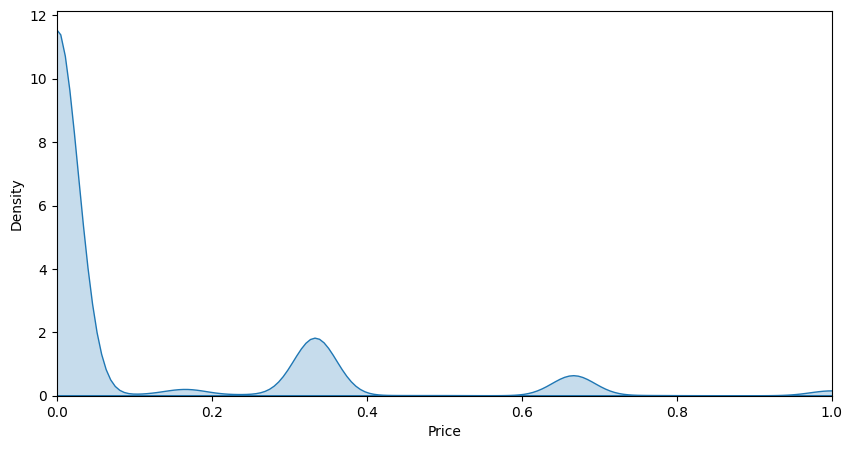

In [151]:
datasetR['target'] = maindataset['hate_speech'].values

outp = train_test_split(datasetR, train_size=0.7)
finaleval=outp[1]
subset=outp[0]

x_subset = subset.drop(columns=["target"]).to_numpy()
y_subset = subset['target'].to_numpy()
x_finaleval = finaleval.drop(columns=["target"]).to_numpy()
y_finaleval = finaleval[['target']].to_numpy()
#size of the training set
len(y_subset)
plt.figure(figsize=(10,5))
plt.xlim(0,1)
plt.xlabel('Price')
plt.ylabel('Density')
sns.kdeplot(y_subset,shade=True)
plt.show()

In [152]:
#initialize
neur = tf.keras.models.Sequential()
#first layer
neur.add(tf.keras.layers.Dense(units=100, activation='linear'))
neur.add(tf.keras.layers.Dense(units=200, activation='relu'))
#third layer. Sigmoid, I want results between 0 and 1
neur.add(tf.keras.layers.Dense(units=500, activation='tanh'))

#output layer. No act for regression
neur.add(tf.keras.layers.Dense(units=1, activation=None))

#using mse for regression. Simple and clear
neur.compile(loss='mse', optimizer='adam', metrics=['mse'])

neur.fit(x_subset, y_subset, batch_size=10000, epochs=700)

Epoch 1/700
2/2 [==============================] - 1s 171ms/step - loss: 1.1539 - mse: 1.1539
Epoch 2/700
2/2 [==============================] - 0s 156ms/step - loss: 0.3493 - mse: 0.3493
Epoch 3/700
2/2 [==============================] - 0s 153ms/step - loss: 0.8525 - mse: 0.8525
Epoch 4/700
2/2 [==============================] - 0s 146ms/step - loss: 0.1646 - mse: 0.1646
Epoch 5/700
2/2 [==============================] - 0s 144ms/step - loss: 0.4236 - mse: 0.4236
Epoch 6/700
2/2 [==============================] - 0s 140ms/step - loss: 0.2443 - mse: 0.2443
Epoch 7/700
2/2 [==============================] - 0s 152ms/step - loss: 0.0991 - mse: 0.0991
Epoch 8/700
2/2 [==============================] - 0s 164ms/step - loss: 0.2527 - mse: 0.2527
Epoch 9/700
2/2 [==============================] - 0s 146ms/step - loss: 0.1128 - mse: 0.1128
Epoch 10/700
2/2 [==============================] - 0s 150ms/step - loss: 0.0764 - mse: 0.0764
Epoch 11/700
2/2 [==============================] - 0s 138m

In [155]:
test_out = neur.predict(x_finaleval)
output2 = outp[1][[0]]
scal = MinMaxScaler()
output2['predicted'] = scal.fit_transform(test_out)
output2['actual'] = y_finaleval
output2 = output2.drop(columns=[0])
output2 = pd.merge(output2, maindataset[['index','tweet']], left_index=True, right_on=['index'])
output2 = output2.sort_values(['predicted'], ascending=False)
pd.options.display.max_colwidth = 150
output2

231/231 [==============================] - 2s 9ms/step


,predicted,actual,index,tweet
24559,1.000000,0.666667,24777,you're such a retard i hope you get type 2 diabetes and die from a sugar rush you fucking faggot @Dare_ILK
17645,0.995068,0.000000,17807,"RT @TooRacist: A black man asked me ""Hey white boy, do you like niggers?""\n\n""Well I wouldn't use that word personally"" I said, ""Like is a st&#8230;"
14127,0.971635,0.666667,14289,RT @BadNewsAli: Look at ya boy @Quanb24 RT @DrydenNeal: Nigga a faggot RT @So_Leaux: Bruh RT @worstrapIyrics: Chance The Rapper http://t.co&#8230;
4525,0.904998,0.333333,4573,"@Roscoedash shut the fuck up, your wack as fuck. Garbage mohawk having faggot, stop making music and shovel my snow scrub."
566,0.895880,0.000000,566,"""They Faggots @JonnieSantana: Orioles petty as fuck...got swept up outta this bitch"""
...,...,...,...,...
21119,0.059822,0.000000,21287,Taria the filterless sis.dari the angelic sis.im the big bro lol and jigg lil bro&#128553;
14878,0.056211,0.000000,15040,"RT @DragonflyJonez: ""You men are trash if your homeboy is cheating and you dont tell his wife/girl and break up their family."" LOLNO"
9452,0.031183,0.000000,9591,Guy tweets: I wanna eat some pussy\n\nFollower replies: facts! \n\nGirl tweets: I wanna suck some dick\n\nFollower replies: hoe!!!\n\nNOT FAIR
20256,0.014960,0.000000,20418,RT @yung_gleesh: If rather fukk a bitch dat fukks eryday den fukk dat bitch who try to hol n be a cold whore n da sheets i cnt een look at &#8230;
